In [27]:
import pandas as pd

file_path = r"D:\2024\课内\AI homework\Decisiontree\6.1\buyCar.csv"

# 带有更多参数的读取
df = pd.read_csv(file_path,
                 encoding='gbk',        # 指定编码
)
print(df.head())

   CustomerID  Age     Sex  Income Bought
0           1   28    Male  Middle     No
1           2   35  Female  Middle     No
2           3   33  Female  Middle     No
3           4   38  Female     Low     No
4           5   22    Male    High     No


In [28]:
# 打印所有列名及其数据类型
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  16 non-null     int64 
 1   Age         16 non-null     int64 
 2   Sex         16 non-null     object
 3   Income      16 non-null     object
 4   Bought      16 non-null     object
dtypes: int64(2), object(3)
memory usage: 772.0+ bytes
None


In [29]:
# 删除列'CustomerID'
df = df.drop('CustomerID', axis=1)

# 打印结果
print(df.head())

   Age     Sex  Income Bought
0   28    Male  Middle     No
1   35  Female  Middle     No
2   33  Female  Middle     No
3   38  Female     Low     No
4   22    Male    High     No


In [31]:
from sklearn.preprocessing import LabelEncoder
# 对'Sex'列进行数值编码
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

# 对'Income'列进行数值编码
df['Income'] = LabelEncoder().fit_transform(df['Income'])

# 对Bought列进行数值编码
df['Bought'] = LabelEncoder().fit_transform(df['Bought'])

# 查看结果
print(df.head())

   Age  Sex  Income  Bought
0   28    1       2       0
1   35    0       2       0
2   33    0       2       0
3   38    0       1       0
4   22    1       0       0


In [33]:
from sklearn.model_selection import train_test_split
car_data = df[["Age","Income","Sex"]].values
car_target = df["Bought"].values
# 切分数据集
X_train,X_test,y_train,y_test=train_test_split(car_data, car_target,
stratify=car_target,random_state=42)
print(X_train.shape,X_test.shape)

(12, 3) (4, 3)


In [38]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
tree=DecisionTreeClassifier(max_depth=4,random_state=0) #设置max_depth=4，限制树的最大深度
tree.fit(X_train,y_train)
print("剪枝后训练集上的准确度：{:.3f}".format(tree.score(X_train,y_train)))
print("剪枝后测试集上的准确度：{:.3f}".format(tree.score(X_test,y_test)))

剪枝后训练集上的准确度：1.000
剪枝后测试集上的准确度：0.750


d:\py\Anaconda3\envs\mathmodeling\Lib\site-packages\sklearn\tree\_export.py:670: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  ann.update_bbox_position_size(renderer)
d:\py\Anaconda3\envs\mathmodeling\Lib\site-packages\sklearn\tree\_export.py:670: UserWarning: Glyph 20080 (\N{CJK UNIFIED IDEOGRAPH-4E70}) missing from font(s) DejaVu Sans.
  ann.update_bbox_position_size(renderer)
d:\py\Anaconda3\envs\mathmodeling\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20080 (\N{CJK UNIFIED IDEOGRAPH-4E70}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\py\Anaconda3\envs\mathmodeling\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


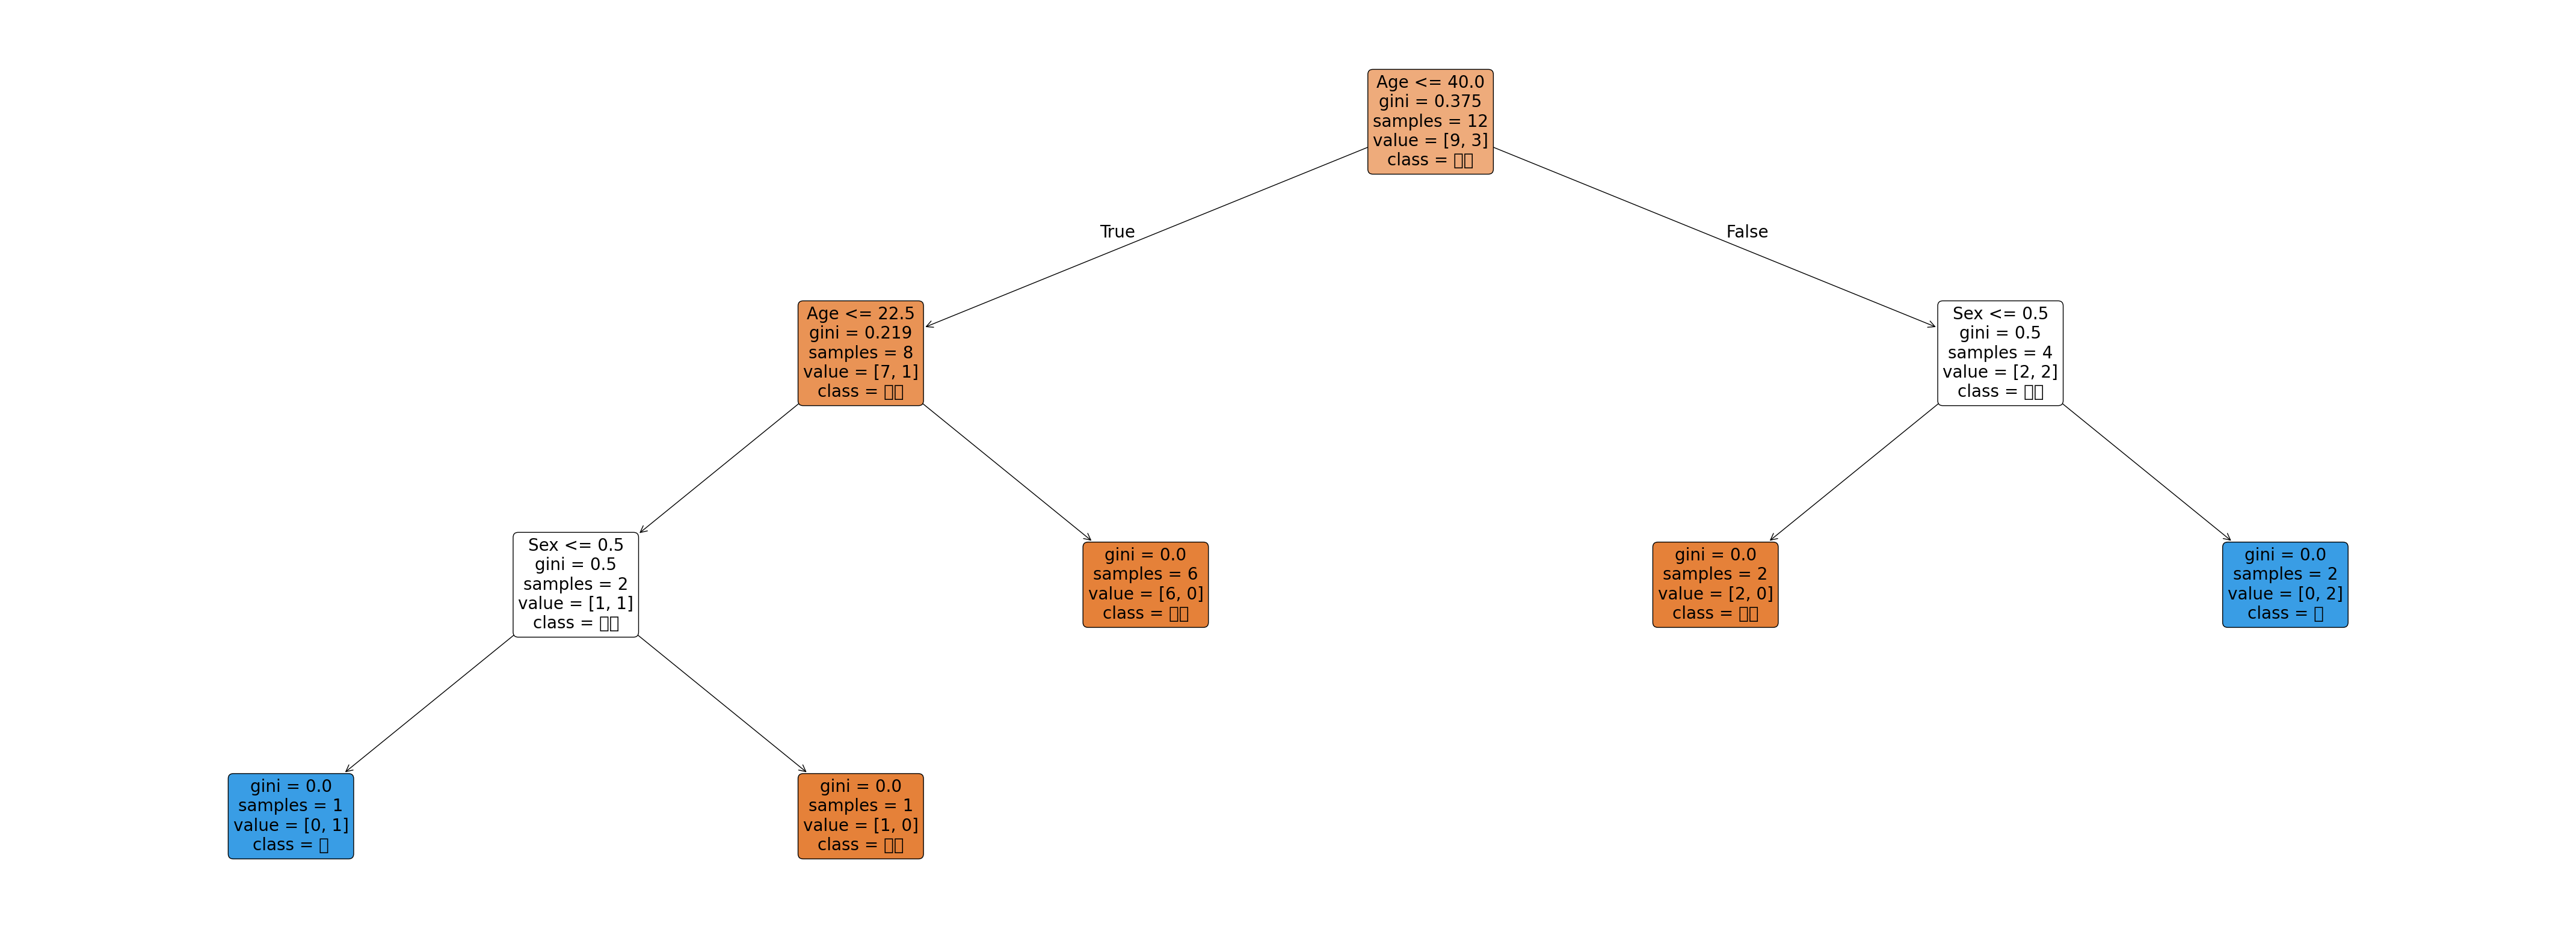

In [43]:
# 绘制决策树
import matplotlib.pyplot as plt
plt.figure(figsize=(55,20))
plot_tree(tree, filled=True, rounded=True, 
          feature_names=["Age", "Income", "Sex"],
          class_names=["不买", "买"], 
          fontsize=20)
plt.show()

In [44]:
# 创建新的测试数据
new_data = [[28, 2, 1]]  # 28岁，高收入(2)，男性(1)

# 使用训练好的模型进行预测
prediction = tree.predict(new_data)

# 输出预测结果
if prediction[0] == 1:
    print("预测结果：会购买汽车")
else:
    print("预测结果：不会购买汽车")

# 如果想要查看预测的概率
probabilities = tree.predict_proba(new_data)
print(f"购买概率: {probabilities[0][1]:.2%}")
print(f"不购买概率: {probabilities[0][0]:.2%}")

预测结果：不会购买汽车
购买概率: 0.00%
不购买概率: 100.00%
